# 2. Compare PostMLF: Negative Mode, All Features

In [1]:
import pandas as pd
import numpy as np
import os
import openpyxl

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


from itertools import combinations
from sklearn.decomposition import PCA
from scipy.stats import zscore, entropy, f_oneway, kruskal
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, jaccard_score
from scipy.spatial.distance import pdist, squareform
from sklearn.cross_decomposition import CCA
import prince


from sklearn.ensemble import IsolationForest

%matplotlib inline

In [2]:
# set the directory 
os.chdir('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results')

In [3]:
# Define the color palette for the sample types
sample_type_palette = {'Must': '#482677FF', 'PostAF': '#238A8DFF','PostMLF': '#74D055FF'}

In [4]:
df_wMetadata_cleaned_collapsed = pd.read_csv('Pos_MS2_OutlierRemoved.csv', index_col=0)
postMLF_df = df_wMetadata_cleaned_collapsed[df_wMetadata_cleaned_collapsed['sample_type'] == 'PostMLF']

In [5]:
postMLF_df.head()

,sample_type,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,Val-Leu.1,Val-Ser,Val-Val,Valylproline,VLK,VLK.1,Xanthine,YLK,α-Aspartylphenylalanine,α-Aspartylphenylalanine.1
Sample Name,,,,,,,,,,,,,,,,,,,,,
PostMLF_2021_Plot14,PostMLF,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,-0.536372,0.385700,0.676601,1.027760,-0.996595,-0.872509,0.579090,-0.950161,-1.082261,0.957138
PostMLF_2021_Plot9,PostMLF,2021,Plot9,-0.501003,-0.526062,-0.347909,-0.485291,-0.634820,0.321202,-0.497063,...,0.330408,0.537018,1.235462,0.759026,-0.246094,-1.025138,0.582293,-0.891719,-0.956203,0.443724
PostMLF_2021_Plot15,PostMLF,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,-0.452500,...,-0.395170,0.439907,0.638677,0.554660,0.061881,-1.169451,0.504978,-0.978633,-1.430715,0.214635
PostMLF_2021_Plot17,PostMLF,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,1.242002,0.756870,0.213115,0.899945,-1.216365,-1.243514,0.341372,-1.050119,1.237547,0.882181
PostMLF_2021_Plot13,PostMLF,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,0.698611,0.554813,1.390592,0.447771,0.222380,0.111434,0.397684,-1.270905,1.558400,2.052771


## Clustermap

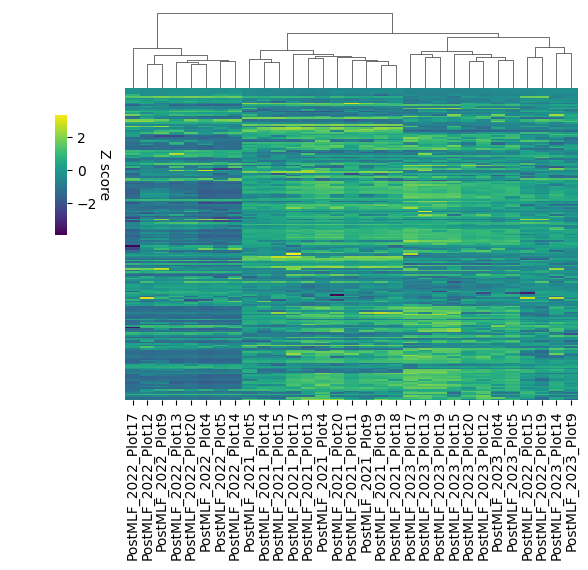

In [6]:
clustermap_df = postMLF_df.iloc[:, 3:].T

# Create clustermap
g = sns.clustermap(
    data=clustermap_df, 
    cmap="viridis", 
    col_cluster=True, 
    row_cluster=False, 
    xticklabels=True, 
    yticklabels=False, 
    figsize=(6, 6)
)

# Remove x-axis description
g.ax_heatmap.set_xlabel("")

# Label the legend
colorbar = g.ax_cbar
colorbar.set_ylabel("Z score", rotation=270, labelpad=10)

# Move legend closer
g.ax_cbar.set_position([0.1, 0.6, 0.02, 0.2])  # Adjust position (left, bottom, width, height)

plt.show()


## PCA plot

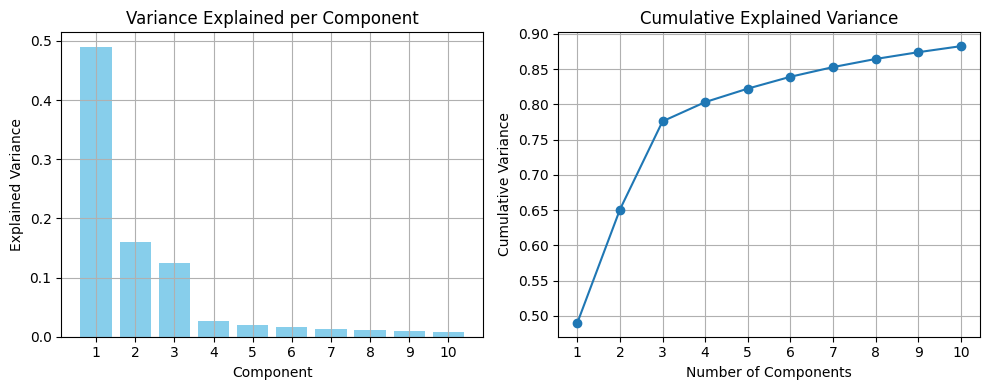

In [7]:
# Instantiate PCA with the max number of components to test
n_components = 10
pca = PCA(n_components=n_components)

# Fit the PCA to your data
pca.fit(df_wMetadata_cleaned_collapsed.iloc[:, 3:])

# Create subplots for the explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot explained variance ratio (variance per component)
axes[0].bar(range(1, n_components + 1), pca.explained_variance_ratio_, color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Plot cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure the plots are displayed nicely
plt.tight_layout()
plt.show()

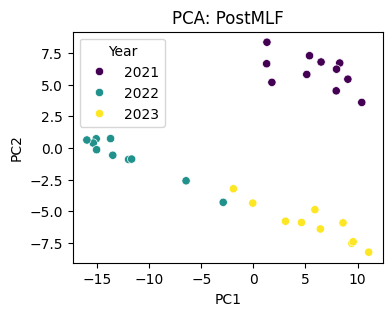

In [8]:
pca = PCA(n_components=3)
pca_scores = pca.fit_transform(postMLF_df.iloc[:, 3:])

df_pca = postMLF_df[['sample_type', 'year', 'plot']].copy()
df_pca['PC1'], df_pca['PC2'] = pca_scores[:, 0], pca_scores[:, 1]

plt.figure(figsize=(4,3))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='year',  palette='viridis')
plt.title('PCA: PostMLF')
plt.legend(title='Year')
plt.show()


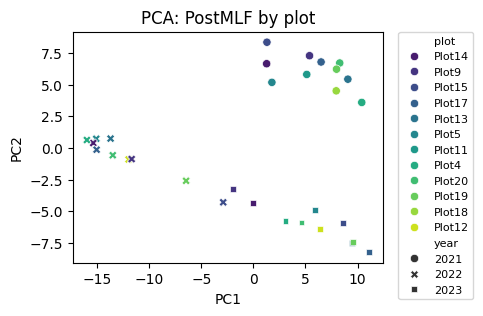

In [9]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='plot', style='year', palette='viridis')
plt.title('PCA: PostMLF by plot')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=8)
plt.show()

## Cluster: Are some plot reliably more similar to each other? 

In [10]:
# Identify plots that are present in every year
plots_per_year = postMLF_df.groupby("year")["plot"].unique().tolist()
common_plots = set(plots_per_year[0]).intersection(*plots_per_year[1:])  # Find common plots

# Subset the dataframe to only include common plots
df_filtered = postMLF_df[postMLF_df["plot"].isin(common_plots)].copy()

In [11]:
# Select only the metabolomics data (excluding metadata columns)
metadata_cols = ["sample_type", "year", "plot"]
df_metabolites = df_filtered.drop(columns=metadata_cols)
df_metabolites.shape

(27, 191)

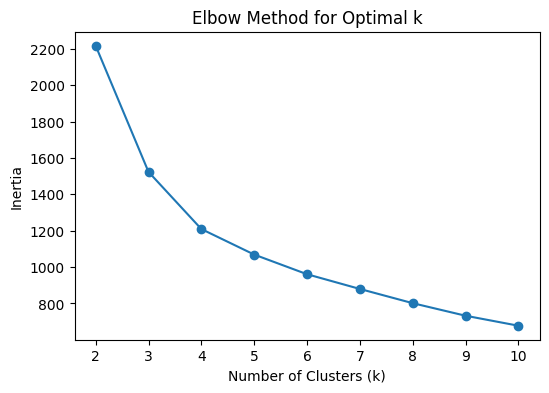

In [12]:
# Determine the number of clusters (k) using the Elbow Method
def optimal_k_elbow(data, max_k=10):
    inertia = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(6, 4))
    plt.plot(range(2, max_k + 1), inertia, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.show()
# Run the elbow method to determine k
optimal_k_elbow(df_metabolites)

In [13]:
# Define the number of clusters
k_clusters = 3

# Ensure 'cluster' column exists as an integer type
df_filtered["cluster"] = -1  

# Apply K-means clustering for each year
for year in df_filtered["year"].unique():
    df_year = df_filtered[df_filtered["year"] == year]
    
    # Extract metabolite data
    df_year_metabolites = df_year.drop(columns=metadata_cols)
    
    # Handle missing values (optional: fill or drop)
    df_year_metabolites = df_year_metabolites.fillna(df_year_metabolites.median())

    # Fit K-means and assign cluster labels
    kmeans = KMeans(n_clusters=k_clusters, random_state=42, n_init=10)
    df_filtered.loc[df_year.index, "cluster"] = kmeans.fit_predict(df_year_metabolites).astype(int)


In [ ]:
# Pivot table to see cluster assignments across years
contingency_table = pd.crosstab(df_filtered["plot"], [df_filtered["year"], df_filtered["cluster"]])
print("\nContingency Table:\n", contingency_table)


Contingency Table:
 year    2021       2022       2023      
cluster    0  1  2    0  1  2    0  1  2
plot                                    
Plot13     0  0  1    0  1  0    0  0  1
Plot14     1  0  0    0  1  0    0  1  0
Plot15     1  0  0    0  0  1    1  0  0
Plot17     0  1  0    1  0  0    0  0  1
Plot19     0  1  0    0  0  1    0  0  1
Plot20     0  1  0    0  1  0    0  0  1
Plot4      0  0  1    0  1  0    1  0  0
Plot5      1  0  0    0  1  0    1  0  0
Plot9      0  1  0    0  1  0    0  1  0


In [15]:
# Get sorted unique years
years = sorted(df_filtered["year"].unique())

# Compute ARI for all pairs of years
for year1, year2 in combinations(years, 2):
    year1_labels = df_filtered[df_filtered["year"] == year1]["cluster"]
    year2_labels = df_filtered[df_filtered["year"] == year2]["cluster"]
    
    # Compute ARI
    if len(year1_labels) == len(year2_labels):
        ari_score = adjusted_rand_score(year1_labels, year2_labels)
        print(f"\nAdjusted Rand Index (ARI) between {year1} and {year2}: {ari_score:.4f}")
    else:
        print(f"\nError: Mismatch in the number of plots between {year1} and {year2}.")



Adjusted Rand Index (ARI) between 2021 and 2022: 0.0649

Adjusted Rand Index (ARI) between 2021 and 2023: -0.1077

Adjusted Rand Index (ARI) between 2022 and 2023: -0.0519


In [16]:
# Get sorted unique years
years = sorted(df_filtered["year"].unique())

# Compute Jaccard similarity for all pairs of years
for year1, year2 in combinations(years, 2):
    year1_labels = df_filtered[df_filtered["year"] == year1]["cluster"]
    year2_labels = df_filtered[df_filtered["year"] == year2]["cluster"]

    # Compute Jaccard Similarity
    if len(year1_labels) == len(year2_labels):
        jaccard = jaccard_score(year1_labels, year2_labels, average="macro")
        print(f"Jaccard Similarity between {year1} and {year2}: {jaccard:.4f}")
    else:
        print(f"Error: Mismatch in the number of plots between {year1} and {year2}.")


Jaccard Similarity between 2021 and 2022: 0.0370
Jaccard Similarity between 2021 and 2023: 0.3000
Jaccard Similarity between 2022 and 2023: 0.0476


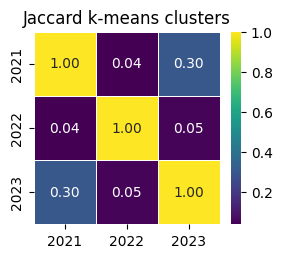

In [17]:
# Get sorted unique years
years = sorted(df_filtered["year"].unique())

# Create an empty similarity matrix
jaccard_matrix = pd.DataFrame(np.eye(len(years)), index=years, columns=years)

# Compute Jaccard similarity for all pairs of years
for year1, year2 in combinations(years, 2):
    year1_labels = df_filtered[df_filtered["year"] == year1]["cluster"]
    year2_labels = df_filtered[df_filtered["year"] == year2]["cluster"]

    # Compute Jaccard Similarity if lengths match
    if len(year1_labels) == len(year2_labels):
        jaccard = jaccard_score(year1_labels, year2_labels, average="macro")
        jaccard_matrix.loc[year1, year2] = jaccard
        jaccard_matrix.loc[year2, year1] = jaccard  # Fill symmetric value
    else:
        jaccard_matrix.loc[year1, year2] = np.nan
        jaccard_matrix.loc[year2, year1] = np.nan

# Plot heatmap
plt.figure(figsize=(3, 2.5))
sns.heatmap(jaccard_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Jaccard k-means clusters")
plt.show()


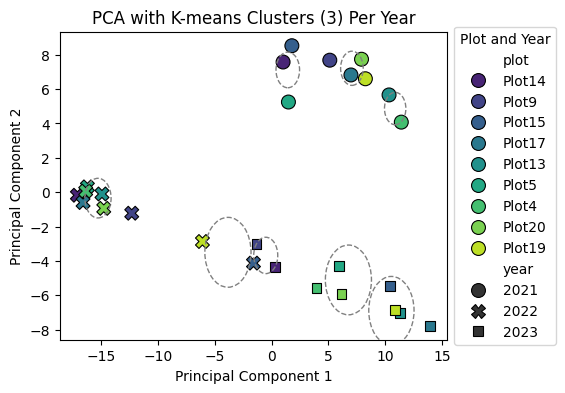

In [18]:
# Select only the metabolomics data (excluding metadata columns)
metadata_cols = ["sample_type", "year", "plot"]
df_metabolites = df_filtered.drop(columns=metadata_cols)

# Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_metabolites)

# Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Add PCA components to the original dataframe for visualization
df_filtered["PCA1"] = pca_result[:, 0]
df_filtered["PCA2"] = pca_result[:, 1]

# Ensure the 'cluster' column is categorical for correct plotting
df_filtered["cluster"] = df_filtered["cluster"].astype("category")

# Create a PCA plot colored by plot, and shape by year
plt.figure(figsize=(5, 4))

# Scatter plot with colors by plot, and shapes by year
sns.scatterplot(data=df_filtered, x="PCA1", y="PCA2", hue="plot", style="year", palette="viridis", s=100, edgecolor="k")

# Circle the clusters per year
for year in df_filtered["year"].unique():
    for cluster in df_filtered["cluster"].cat.categories:  # Loop through categorical clusters
        cluster_data = df_filtered[(df_filtered["year"] == year) & (df_filtered["cluster"] == cluster)]
        mean_x = cluster_data["PCA1"].mean()
        mean_y = cluster_data["PCA2"].mean()
        std_dev = cluster_data[["PCA1", "PCA2"]].std().mean()
            
        # Draw a circle around the cluster
        plt.gca().add_patch(plt.Circle((mean_x, mean_y), radius=std_dev, color="gray", fill=False, linestyle="--"))

plt.title("PCA with K-means Clusters (3) Per Year")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Move legend to the right side of the plot
plt.legend(title="Plot and Year", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


# PERMANOVA 

> note. the `LC-MS_metadata.csv` file is created in the `Metabolomics/LC-MS/01_LC-MS_Neg_All.ipynb` notebook

In [19]:
# Compute distance matrices
bray_curtis_matrix = squareform(pdist(postMLF_df.iloc[:, 3:], metric='braycurtis'))
jaccard_matrix = squareform(pdist(postMLF_df.iloc[:, 3:], metric='jaccard'))
cosine_matrix = squareform(pdist(postMLF_df.iloc[:, 3:], metric='cosine'))

# Convert to DataFrame with appropriate indexing
sample_ids = postMLF_df.index  # Assuming row indices correspond to sample IDs

bray_curtis_df = pd.DataFrame(bray_curtis_matrix, index=sample_ids, columns=sample_ids)
jaccard_df = pd.DataFrame(jaccard_matrix, index=sample_ids, columns=sample_ids)
cosine_df =  pd.DataFrame(cosine_matrix, index=sample_ids, columns=sample_ids)

# Save to TSV
bray_curtis_df.to_csv("Pos_MS1MS2_BrayCurtis.tsv", sep="\t")
jaccard_df.to_csv("Pos_MS1MS2_Jaccard.tsv", sep="\t")
cosine_df.to_csv("Pos_MS1MS2_Cosine.tsv", sep="\t")

In [20]:
%%bash
Rscript /home/lfloerl/microterroir/Microbiome/Other_scripts/permanova.R Pos_MS1MS2_BrayCurtis.tsv LC-MS_metadata.csv "year + plot"


PERMANOVA Results:
     Term         R2 Pr(>F)
     year 0.09023289  0.144
     plot 0.13324826  0.978
 Residual 0.77671430     NA
    Total 1.00000000     NA


In [21]:
%%bash
Rscript /home/lfloerl/microterroir/Microbiome/Other_scripts/permanova.R Pos_MS1MS2_Jaccard.tsv LC-MS_metadata.csv "year + plot"


PERMANOVA Results:
     Term         R2 Pr(>F)
     year 0.03333333      1
     plot 0.36666667      1
 Residual 0.60000000     NA
    Total 1.00000000     NA


In [22]:
%%bash
Rscript /home/lfloerl/microterroir/Microbiome/Other_scripts/permanova.R Pos_MS1MS2_Cosine.tsv LC-MS_metadata.csv "year + plot"


PERMANOVA Results:
     Term        R2 Pr(>F)
     year 0.1691103  0.031
     plot 0.1204576  0.999
 Residual 0.6955475     NA
    Total 1.0000000     NA


## MFA 

In [23]:
postMLF_df_reset = postMLF_df.reset_index()
postMLF_df_reset.head()

,Sample Name,sample_type,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",...,Val-Leu.1,Val-Ser,Val-Val,Valylproline,VLK,VLK.1,Xanthine,YLK,α-Aspartylphenylalanine,α-Aspartylphenylalanine.1
0,PostMLF_2021_Plot14,PostMLF,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,...,-0.536372,0.385700,0.676601,1.027760,-0.996595,-0.872509,0.579090,-0.950161,-1.082261,0.957138
1,PostMLF_2021_Plot9,PostMLF,2021,Plot9,-0.501003,-0.526062,-0.347909,-0.485291,-0.634820,0.321202,...,0.330408,0.537018,1.235462,0.759026,-0.246094,-1.025138,0.582293,-0.891719,-0.956203,0.443724
2,PostMLF_2021_Plot15,PostMLF,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,...,-0.395170,0.439907,0.638677,0.554660,0.061881,-1.169451,0.504978,-0.978633,-1.430715,0.214635
3,PostMLF_2021_Plot17,PostMLF,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,...,1.242002,0.756870,0.213115,0.899945,-1.216365,-1.243514,0.341372,-1.050119,1.237547,0.882181
4,PostMLF_2021_Plot13,PostMLF,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,...,0.698611,0.554813,1.390592,0.447771,0.222380,0.111434,0.397684,-1.270905,1.558400,2.052771


In [24]:
#### 1. MERGE ALL 

# CHEMISTRY
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/Raw-MD_Vineyard_MV_data.csv')
md["Plot_str"] = "Plot" + md["Plot"].astype(str)
md_wine_chemistry = md[['Plot_str', 'Year', 'Must_Oechsle', 'Wine_Tartatic_Acid', 
                        'Wine_Malic_Acid', 'Wine_Glucose', 'Wine_Fructose', 
                        'Wine_Lactic_Acid', 'Wien_Glycerol', 'Wine_Acetic_Acid']]

df_merged = postMLF_df_reset.merge(md_wine_chemistry, left_on=["plot", "year"], right_on=["Plot_str", "Year"], how="inner")
df_merged = df_merged.drop(columns=['Plot_str', 'Year', 'sample_type'])


# PLOTS
md_plots = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux_plots.csv')
md_plots["Plot_str"] = "Plot" + md_plots["Plot"].astype(str)
md_plots_subset =  md_plots[['Plot_str', 'Altitude', 'Average_slope', 'Exposition', 'Average_radiation', 'Geology', 'Hydromorphie_code']]
# Convert categorical columns to dummy variables
categorical_cols = ['Exposition', 'Geology']
md_plots_subset_dummies = pd.get_dummies(md_plots_subset, columns=categorical_cols, drop_first=True)
# Convert boolean columns to integers (0 or 1)
boolean_columns = md_plots_subset_dummies.select_dtypes(include='bool').columns
md_plots_subset_dummies[boolean_columns] = md_plots_subset_dummies[boolean_columns].astype(int)

df_merged = df_merged.merge(md_plots_subset_dummies, left_on=["plot"], right_on=["Plot_str"], how="inner")
df_merged = df_merged.drop(columns=['Plot_str'])


# CLIMATE
md_climate = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux-Climate.csv', index_col=0)
# Remove underscores from the 'Plot' column
md_climate['Plot'] = md_climate['Plot'].str.replace('_', '', regex=False)
md_climate_subset = md_climate[['Plot', 'Year','average_rh', 'average_temperature']]

df_merged_all = df_merged.merge(md_climate_subset, left_on=["plot", "year"], right_on=["Plot", "Year"], how="inner")
df_merged_all = df_merged_all.drop(columns=['Plot', 'Year'])
df_merged_all = df_merged_all.dropna()


# Keep track of the columns' origins
metabolites_columns = postMLF_df_reset.iloc[:, 4:].columns.tolist()
wine_chemistry_columns = md_wine_chemistry.iloc[:, 2:].columns.tolist()
plots_columns = md_plots_subset_dummies.iloc[:, 1:].columns.tolist()
climate_columns = md_climate_subset.iloc[:, 2:].columns.tolist()
metadata_columns = ['Sample Name', 'year', 'plot']

df_merged_all.head()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,Altitude,Average_slope,Average_radiation,Hydromorphie_code,Exposition_South-West,Geology_Colluvium,Geology_Gravel_moraine,Geology_Molasse,average_rh,average_temperature
0,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,440,25,912.5,1,0,0,0,0,70.767447,18.343627
1,PostMLF_2021_Plot9,2021,Plot9,-0.501003,-0.526062,-0.347909,-0.485291,-0.634820,0.321202,-0.497063,...,520,35,887.5,0,1,0,0,1,73.022541,17.902585
2,PostMLF_2021_Plot15,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,-0.452500,...,520,30,912.5,0,1,0,1,0,72.104023,17.892713
3,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,390,20,912.5,1,1,0,0,1,72.076768,18.476535
4,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,580,30,937.5,1,1,0,0,1,71.334895,17.544612


In [25]:
# Create a multi-index column structure
multi_index_columns = (
    [('Metabolites', col) for col in metabolites_columns] +
    [('Wine Chemistry', col) for col in wine_chemistry_columns] +
    [('Plots', col) for col in plots_columns] +
    [('Climate', col) for col in climate_columns]
)

# Subset data and assign multi-index
df_metadata = df_merged_all[metadata_columns]  # Keep metadata separately
df_mfa = df_merged_all.drop(columns=metadata_columns)  # Drop metadata
df_mfa.columns = pd.MultiIndex.from_tuples(multi_index_columns)  # Assign multi-index

# Extract the group names (first level of multi-index)
groups = df_mfa.columns.levels[0].tolist()
groups

['Climate', 'Metabolites', 'Plots', 'Wine Chemistry']

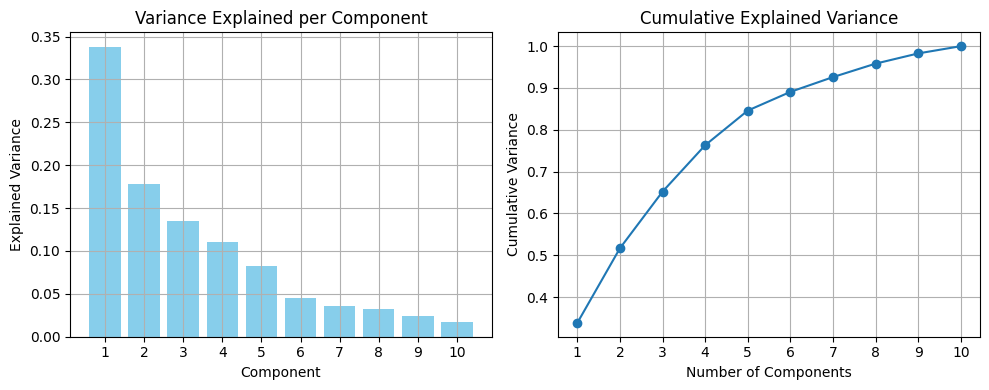

In [26]:
# Define the number of components to test
n_components = 10

# Define MFA and fit the model
mfa = prince.MFA(
    n_components=n_components,  # Use 10 components
    n_iter=3, 
    copy=True,
    check_input=True,
    random_state=42)

# Fit MFA to the data (excluding metadata columns)
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

# Get explained variance per component
explained_variance_ratio = mfa.eigenvalues_ / np.sum(mfa.eigenvalues_)

# Create subplots for explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot for variance explained per component
axes[0].bar(range(1, n_components + 1), explained_variance_ratio[:n_components], color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Line plot for cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio[:n_components]), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()


In [27]:
# Initialize MFA model
mfa = prince.MFA(
    n_components=5,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit MFA with multi-index groups
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

mfa_results = mfa.transform(df_mfa)
# Merge MFA results with metadata to retain 'year' information
mfa_results = mfa_results.merge(df_metadata, left_index=True, right_index=True)

mfa.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.599,31.22%,31.22%
1,1.373,16.49%,47.71%
2,1.041,12.50%,60.21%
3,0.853,10.25%,70.46%
4,0.637,7.66%,78.12%


In [28]:
contributions = mfa.column_contributions_
contributions

component,0,1,2,3,4
variable,,,,,
"(Climate, average_rh)",0.195773,0.004052,0.068374,0.031152,0.001067
"(Climate, average_temperature)",0.126025,0.125001,0.009436,0.008878,0.004236
"(Metabolites, 1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine)",0.002612,0.000149,0.000206,0.000458,0.000385
"(Metabolites, 1,2-Dilinoleoyl-sn-glycero-3-phosphocholine)",0.001756,0.000367,0.000556,0.000449,0.000825
"(Metabolites, 1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine)",0.001710,0.000212,0.000901,0.000541,0.000528
...,...,...,...,...,...
"(Wine Chemistry, Wine_Glucose)",0.017399,0.081148,0.085322,0.007292,0.000925
"(Wine Chemistry, Wine_Fructose)",0.000168,0.099875,0.067550,0.003716,0.007682
"(Wine Chemistry, Wine_Lactic_Acid)",0.076193,0.000924,0.026417,0.022469,0.000036


In [29]:
mfa_results.head()

,0,1,2,3,4,Sample Name,year,plot
0,-0.705008,0.467769,-1.408614,-0.186945,-0.857956,PostMLF_2021_Plot14,2021,Plot14
1,-1.416552,-0.678542,-0.054990,-1.444623,0.468710,PostMLF_2021_Plot9,2021,Plot9
2,-1.474176,-1.163470,-0.350958,-0.105848,-0.284819,PostMLF_2021_Plot15,2021,Plot15
3,-1.581865,1.304352,-0.551234,-1.031498,0.645583,PostMLF_2021_Plot17,2021,Plot17
4,-1.618555,-0.189395,-0.861264,0.034448,1.153237,PostMLF_2021_Plot13,2021,Plot13


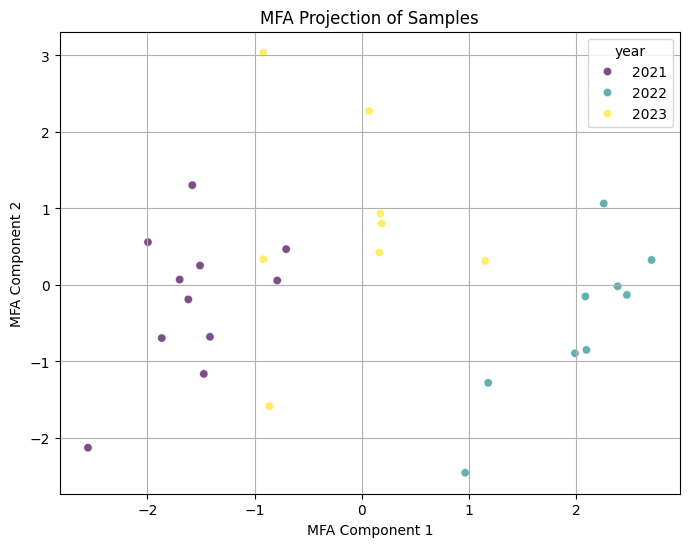

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)
plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")
plt.title("MFA Projection of Samples")
plt.grid()
plt.show()

In [31]:
mfa.plot(
    df_mfa,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

In [32]:
mfa['Climate'].eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,1.563,78.13%,78.13%
1,0.437,21.87%,100.00%


In [33]:
mfa['Metabolites'].eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,102.242,53.53%,53.53%
1,27.344,14.32%,67.85%
2,7.688,4.03%,71.87%
3,6.140,3.21%,75.09%
4,5.024,2.63%,77.72%


In [34]:
mfa['Plots'].eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.643,33.04%,33.04%
1,1.951,24.38%,57.42%
2,1.383,17.29%,74.71%
3,0.683,8.54%,83.25%
4,0.566,7.08%,90.33%


In [35]:
mfa['Wine Chemistry'].eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.718,46.48%,46.48%
1,2.495,31.18%,77.66%
2,0.897,11.21%,88.87%
3,0.350,4.38%,93.25%
4,0.250,3.12%,96.38%


In [36]:
# Extract coordinates of individuals (rows)
individuals = mfa_results.iloc[:, :2].values  # First 2 components

# Extract variable loadings (correlations with MFA axes)
variable_loadings = mfa.column_correlations.iloc[:, :2]

# Drop the multi-index
variable_loadings_df = variable_loadings.reset_index()

# Rename columns
variable_loadings_df.columns = ["Variable", "MFA Comp 1", "MFA Comp 2"]

# Compute Loadings contribution (sum of squared correlations)
variable_loadings_df["Loadings Contribution"] = ( variable_loadings_df["MFA Comp 1"].abs() + variable_loadings_df["MFA Comp 2"].abs())

# Sort by Loadings contribution in descending order
variable_loadings_df = variable_loadings_df.sort_values(by="Loadings Contribution", ascending=False)

variable_loadings_df.tail()

,Variable,MFA Comp 1,MFA Comp 2,Loadings Contribution
195,"(Plots, Average_radiation)",-0.054606,0.125969,0.180574
170,"(Metabolites, trans-3-Indoleacrylic acid)",-0.020772,0.157225,0.177997
188,"(Metabolites, VLK.1)",-0.157279,0.010919,0.168199
50,"(Metabolites, Erucamide)",0.031147,0.121163,0.152310
34,"(Metabolites, Arg-Leu)",-0.055114,-0.028998,0.084112


In [37]:
# Extract the first element of the tuple as the 'group'
variable_loadings_df["group"] = variable_loadings_df["Variable"].apply(lambda x: x[0])

# Filter out 'Metabolites'
filtered_loadings_df = variable_loadings_df[variable_loadings_df["group"] != "Metabolites"]

# Select top 20 based on Loadings Contribution
top_loadings = filtered_loadings_df.nlargest(15, "Loadings Contribution")
top_loadings['Variable'] = top_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

top_loadings

,Variable,MFA Comp 1,MFA Comp 2,Loadings Contribution,group
1,'average_temperature',0.715450,0.517828,1.233278,Climate
203,'Wine_Malic_Acid',-0.405289,0.652793,1.058082,Wine Chemistry
204,'Wine_Glucose',-0.410082,0.643615,1.053697,Wine Chemistry
201,'Must_Oechsle',0.580611,0.426697,1.007308,Wine Chemistry
202,'Wine_Tartatic_Acid',-0.893203,0.106392,0.999594,Wine Chemistry
207,'Wien_Glycerol',-0.813371,0.184178,0.997549,Wine Chemistry
0,'average_rh',-0.891717,0.093227,0.984944,Climate
199,'Geology_Gravel_moraine',-0.354396,-0.600824,0.955220,Plots
208,'Wine_Acetic_Acid',-0.460260,0.474101,0.934361,Wine Chemistry
206,'Wine_Lactic_Acid',-0.858155,0.068693,0.926849,Wine Chemistry


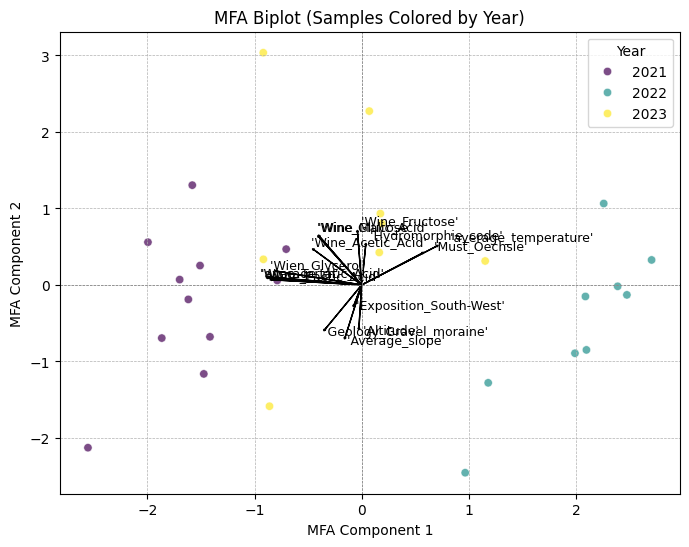

In [38]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)


# Define a scaling factor to extend the arrows
scaling_factor = 1 # Adjust this value to control arrow length
# Plot the top loadings as arrows
for i, row in top_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  # Adjust text position accordingly
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)


# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Samples Colored by Year)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

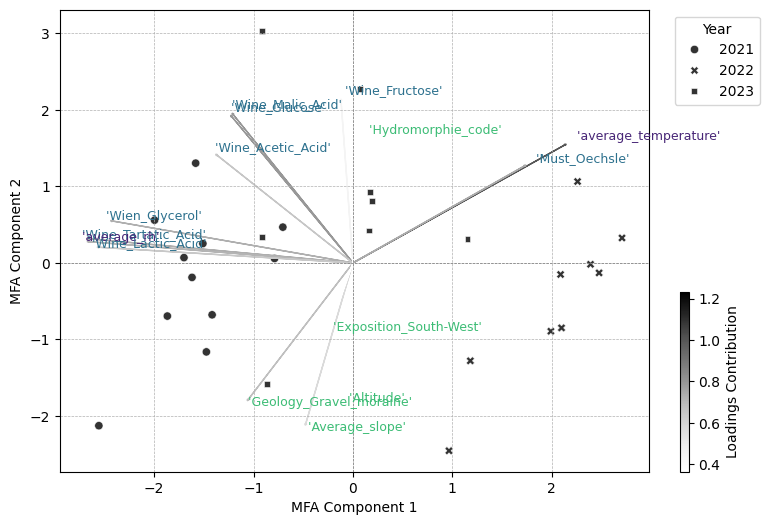

In [39]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], style="year", alpha=0.8, color='black')

# Define a scaling factor to extend the arrows
scaling_factor = 3  # Adjust this value to control arrow length

# Create a color map based on the group and intensity (Total Contribution)
group_colors = {'Climate': '#482677FF', 'Wine Chemistry': '#2D718EFF', 'Plots': '#3CBC75FF'}  # Define custom colors for each group
norm = plt.Normalize(vmin=top_loadings['Loadings Contribution'].min(), vmax=top_loadings['Loadings Contribution'].max())  # Normalize based on Loadings Contribution
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm)
sm.set_array([])

# Plot the top loadings as arrows with colors based on the group and intensity by Total Contribution
for i, row in top_loadings.iterrows():
    # Color based on group
    group_color = group_colors.get(row['group'], 'black')  # Default to black if group is not found
    # Scale the arrow by Loadings Contribution
    intensity = norm(row['Loadings Contribution'])
    
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color=sm.to_rgba(intensity), length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  # Adjust text position accordingly
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9, color=group_color)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("")

# Add colorbar for Loadings Contribution intensity
cbar = fig.colorbar(sm, ax=ax, fraction=0.01, pad=0.04, location='right')
cbar.ax.set_position([0.9, 0.11, 0.7, 0.3]) 
cbar.set_label("Loadings Contribution")

# Show grid and legend
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1.2, 1))

plt.show()


/scratch/lfloerl/tmpdata/ipykernel_2647305/184578375.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=group_influence.reset_index(), x="group", y="Total Influence", palette="viridis")


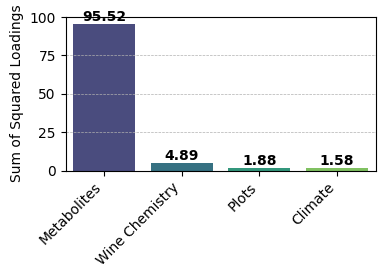

In [40]:
# Compute the total influence per group as the sum of squared loadings
group_influence = variable_loadings_df.groupby("group")[["MFA Comp 1", "MFA Comp 2"]].apply(lambda x: (x**2).sum())

# Sort to see which groups contribute the most
group_influence = group_influence.sort_values(by=["MFA Comp 1", "MFA Comp 2"], ascending=False)

# Compute total influence per group
group_influence["Total Influence"] = group_influence["MFA Comp 1"] + group_influence["MFA Comp 2"]

# Sort groups by total influence
group_influence = group_influence.sort_values(by="Total Influence", ascending=False)
# Plot
plt.figure(figsize=(4, 2))
ax = sns.barplot(data=group_influence.reset_index(), x="group", y="Total Influence", palette="viridis")

# Add numeric values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Sum of Squared Loadings")
plt.title("")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()


/scratch/lfloerl/tmpdata/ipykernel_2647305/1612427859.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=group_influence, x="group", y="Total Influence", palette=palette)


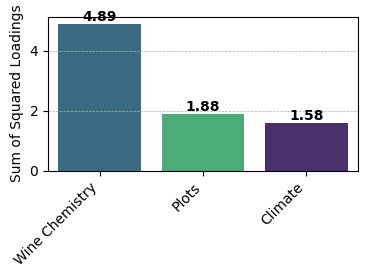

In [41]:
# Exclude Metabolites groups
filtered_loadings_df = variable_loadings_df[~variable_loadings_df["group"].isin(["Metabolites"])]

# Compute the total influence per group as the sum of squared loadings
group_influence = filtered_loadings_df.groupby("group")[["MFA Comp 1", "MFA Comp 2"]].apply(lambda x: (x**2).sum())

# Compute total influence per group
group_influence["Total Influence"] = group_influence["MFA Comp 1"] + group_influence["MFA Comp 2"]

# Sort groups by total influence
group_influence = group_influence.sort_values(by="Total Influence", ascending=False).reset_index()

# Define custom colors for each group
group_colors = {'Climate': '#482677FF', 'Wine Chemistry': '#2D718EFF', 'Plots': '#3CBC75FF'}
palette = [group_colors.get(group, "#808080") for group in group_influence["group"]]  # Default gray if not specified

# Plot
plt.figure(figsize=(4, 2))
ax = sns.barplot(data=group_influence, x="group", y="Total Influence", palette=palette)

# Add numeric values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Sum of Squared Loadings")
plt.title("")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()
